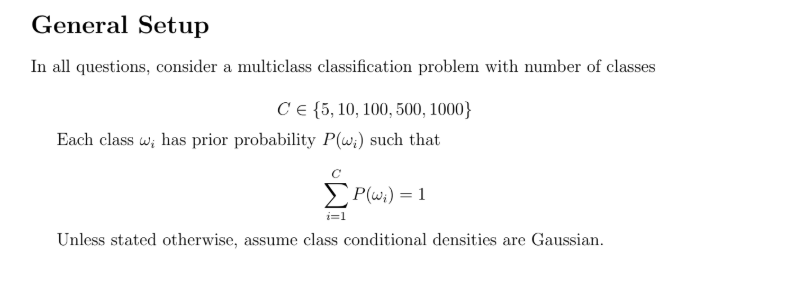

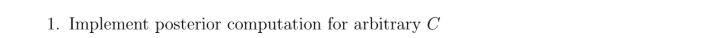

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def generate_parameters(C):
    mu = np.linspace(0, 10, C)
    sigma2 = np.random.uniform(0.5, 2.0, C)
    priors = np.ones(C) / C
    return mu, sigma2, priors

def posterior(x, mu, sigma2, priors):
    likelihoods = np.array([
        norm.pdf(x, mu[i], np.sqrt(sigma2[i]))
        for i in range(len(mu))
    ])
    numerator = likelihoods * priors
    return numerator / np.sum(numerator)


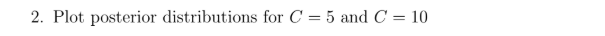

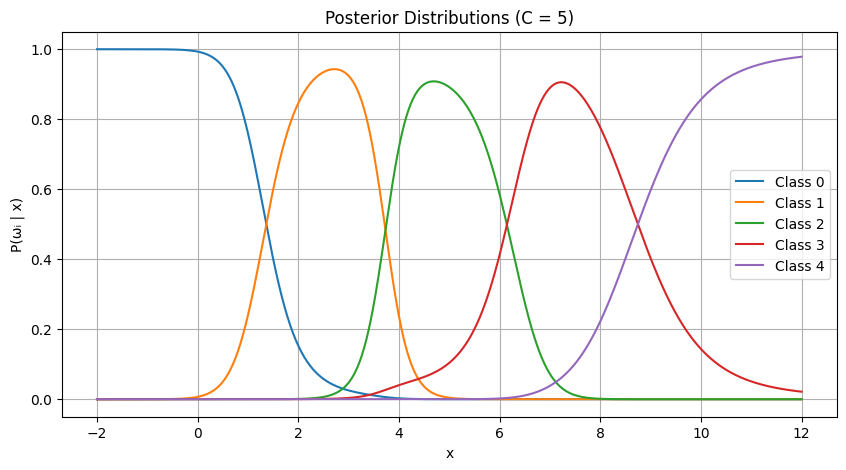

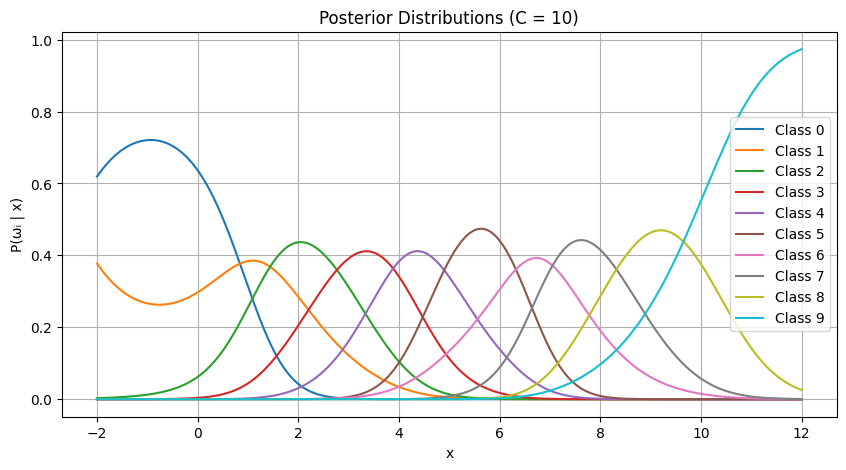

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def compute_posteriors(x_vals, mu, sigma2, priors):
    C = len(mu)
    likelihoods = np.zeros((C, len(x_vals)))

    for i in range(C):
        likelihoods[i, :] = norm.pdf(x_vals, mu[i], np.sqrt(sigma2[i]))

    numerator = likelihoods * priors[:, None]
    denominator = np.sum(numerator, axis=0)

    posteriors = numerator / denominator
    return posteriors
def plot_posteriors(C):
    mu = np.linspace(0, 10, C)
    sigma2 = np.random.uniform(0.5, 2.0, C)
    priors = np.ones(C) / C

    x_vals = np.linspace(-2, 12, 1000)
    posteriors = compute_posteriors(x_vals, mu, sigma2, priors)

    plt.figure(figsize=(10, 5))

    for i in range(C):
        plt.plot(x_vals, posteriors[i], label=f"Class {i}")

    plt.title(f"Posterior Distributions (C = {C})")
    plt.xlabel("x")
    plt.ylabel("P(ωᵢ | x)")
    if C <= 10:
        plt.legend()
    plt.grid()
    plt.show()

plot_posteriors(5)
plot_posteriors(10)


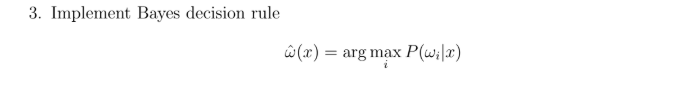

In [ ]:
def bayes_classifier(x, mu, sigma2, priors):
    likelihoods = np.array([
        norm.pdf(x, mu[i], np.sqrt(sigma2[i]))
        for i in range(len(mu))
    ])

    posteriors = likelihoods * priors
    return np.argmax(posteriors)

def bayes_classifier_vectorized(x, mu, sigma2, priors):
    likelihoods = norm.pdf(x, mu, np.sqrt(sigma2))
    return np.argmax(likelihoods * priors)


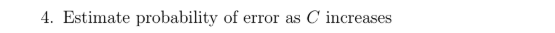

In [ ]:
def estimate_error(C, N=10000):
    mu, sigma2, priors = generate_parameters(C)
    errors = 0

    for _ in range(N):
        true_class = np.random.choice(C, p=priors)
        x = np.random.normal(mu[true_class], np.sqrt(sigma2[true_class]))

        predicted = bayes_classifier(x, mu, sigma2, priors)
        if predicted != true_class:
            errors += 1

    return errors / N

for C in [5, 10, 100, 500, 1000]:
    error = estimate_probability_of_error(C)
    print(f"C = {C:4d} | Probability of Error ≈ {error:.4f}")


C =    5 | Probability of Error ≈ 0.2317
C =   10 | Probability of Error ≈ 0.5217
C =  100 | Probability of Error ≈ 0.9475
C =  500 | Probability of Error ≈ 0.9858
C = 1000 | Probability of Error ≈ 0.9936


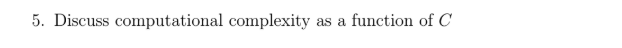

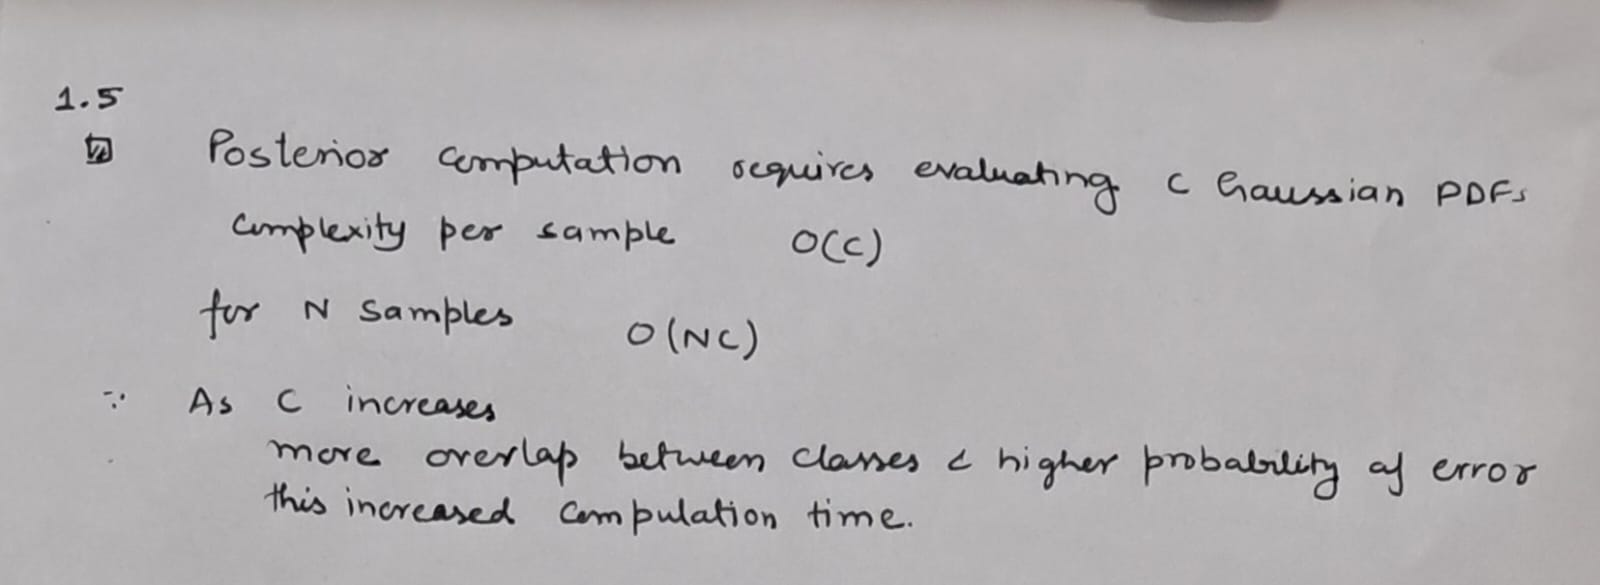

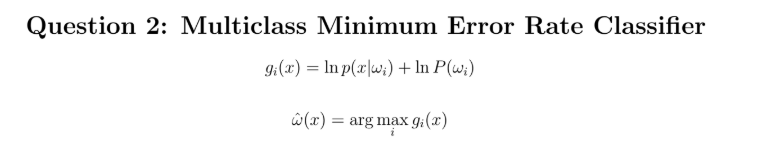

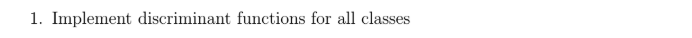

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def generate_classes(C):
    mus = np.linspace(0, 10, C)
    sigmas = np.random.uniform(0.5, 2.0, C)
    priors = np.ones(C) / C
    return mus, sigmas, priors


def discriminant_functions(x, mus, sigmas, priors):
    C = len(mus)
    g = np.zeros((len(x), C))

    for i in range(C):
        g[:, i] = (
            - (x - mus[i])**2 / (2 * sigmas[i]**2)
            - np.log(np.sqrt(2 * np.pi * sigmas[i]**2))
            + np.log(priors[i])
        )
    return g


def minimum_error_classifier(x, mus, sigmas, priors):
    g = discriminant_functions(x, mus, sigmas, priors)
    return np.argmax(g, axis=1)



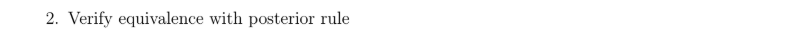

In [8]:
x = np.linspace(-2, 12, 1000)

def posterior_classifier(x, mus, sigmas, priors):
    C = len(mus)
    post = np.zeros((len(x), C))

    for i in range(C):
        post[:, i] = norm.pdf(x, mus[i], sigmas[i]) * priors[i]

    post /= np.sum(post, axis=1, keepdims=True)
    return np.argmax(post, axis=1)


    x = np.linspace(-2, 12, 1000)
C = 5

mus, sigmas, priors = generate_classes(C)

pred_disc = minimum_error_classifier(x, mus, sigmas, priors)
pred_post = posterior_classifier(x, mus, sigmas, priors)

print("Classifiers identical:",
      np.all(pred_disc == pred_post))



Classifiers identical: True


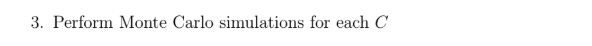

In [10]:
def estimate_error_min_error(C, N=10000, seed=42):
    np.random.seed(seed)

    # Generate class parameters
    mus, sigmas, priors = generate_classes(C)

    # Sample true classes
    true_classes = np.random.choice(C, size=N, p=priors)

    # Generate samples from corresponding Gaussians
    samples = np.array([
        np.random.normal(mus[i], sigmas[i]) for i in true_classes
    ])

    # Classify samples
    predicted_classes = minimum_error_classifier(
        samples, mus, sigmas, priors
    )

    # Compute probability of error
    error_rate = np.mean(predicted_classes != true_classes)

    return error_rate

## Testing here for the same
C = 5
error = estimate_error_min_error(C)

print(f"Estimated Probability of Error for C = {C}: {error:.4f}")


Estimated Probability of Error for C = 5: 0.3005


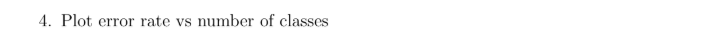

C = 2, Error = 0.0004
C = 5, Error = 0.3005
C = 10, Error = 0.5397
C = 20, Error = 0.7235
C = 30, Error = 0.8014


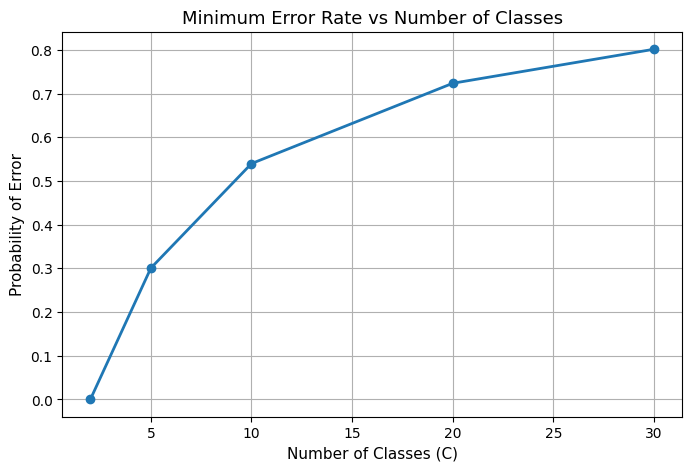

In [11]:
C_values = [2, 5, 10, 20, 30]
error_rates = []

for C in C_values:
    error = estimate_error_min_error(C)
    error_rates.append(error)
    print(f"C = {C}, Error = {error:.4f}")


# Graph

plt.figure(figsize=(8, 5))
plt.plot(C_values, error_rates, marker='o', linewidth=2)
plt.xlabel("Number of Classes (C)", fontsize=11)
plt.ylabel("Probability of Error", fontsize=11)
plt.title("Minimum Error Rate vs Number of Classes", fontsize=13)
plt.grid(True)
plt.show()


3 2 5.png

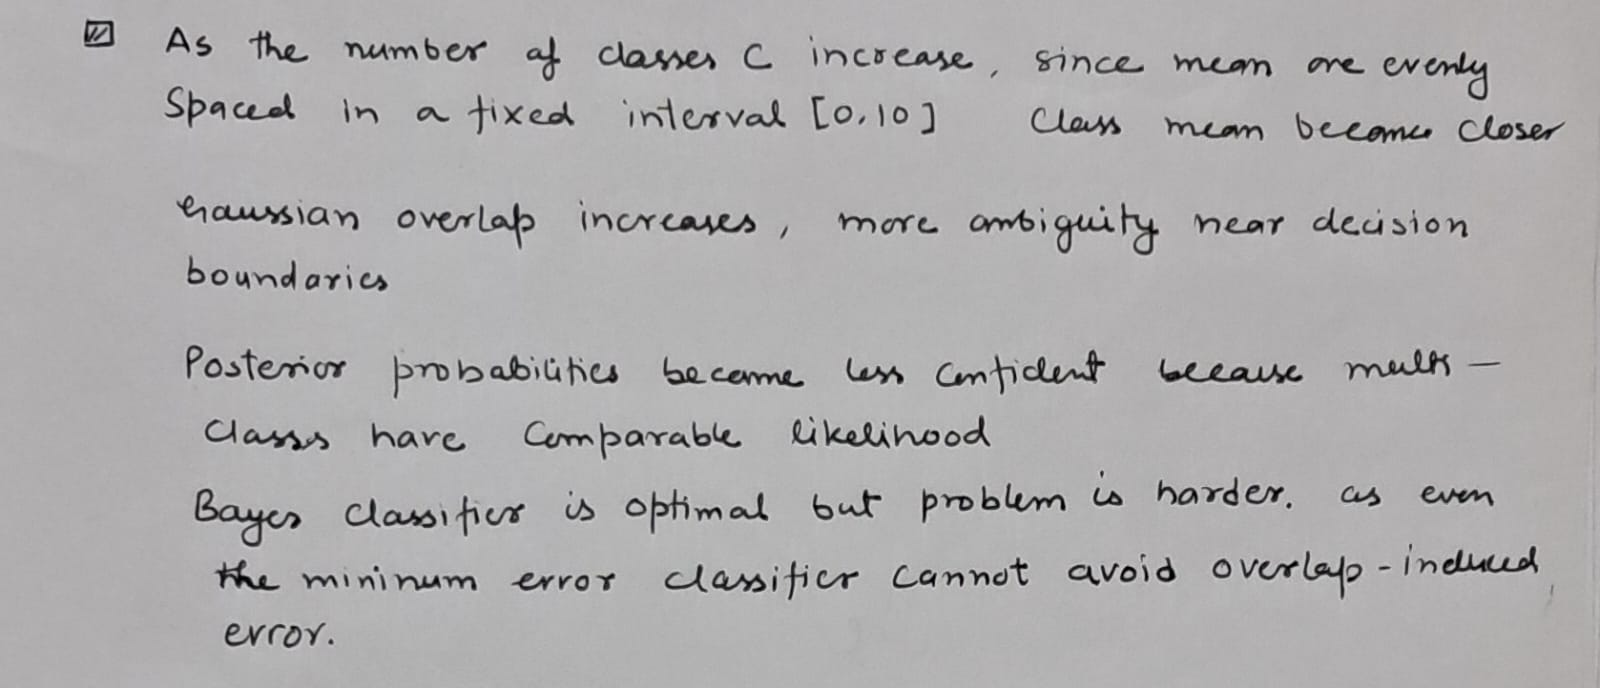

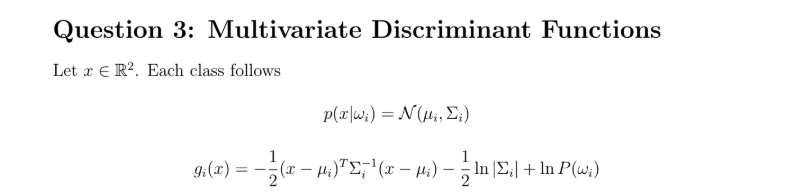

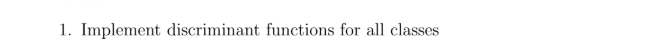

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv, det


def generate_multivariate_classes(C, dim=2):
    mus = []
    covs = []
    priors = np.ones(C) / C

    for _ in range(C):
        mu = np.random.uniform(-5, 5, dim)

        A = np.random.randn(dim, dim)
        cov = A @ A.T + 0.5 * np.eye(dim)  # positive definite

        mus.append(mu)
        covs.append(cov)

    return np.array(mus), np.array(covs), priors


def multivariate_discriminant(X, mus, covs, priors):
    N = X.shape[0]
    C = len(mus)
    d = X.shape[1]

    g = np.zeros((N, C))

    for i in range(C):
        diff = X - mus[i]
        inv_cov = inv(covs[i])

        quad_term = np.sum(diff @ inv_cov * diff, axis=1)

        g[:, i] = (
            -0.5 * quad_term
            -0.5 * np.log(det(covs[i]))
            + np.log(priors[i])
        )

    return g

def classify_multivariate(X, mus, covs, priors):
    g = multivariate_discriminant(X, mus, covs, priors)
    return np.argmax(g, axis=1)


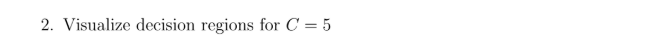

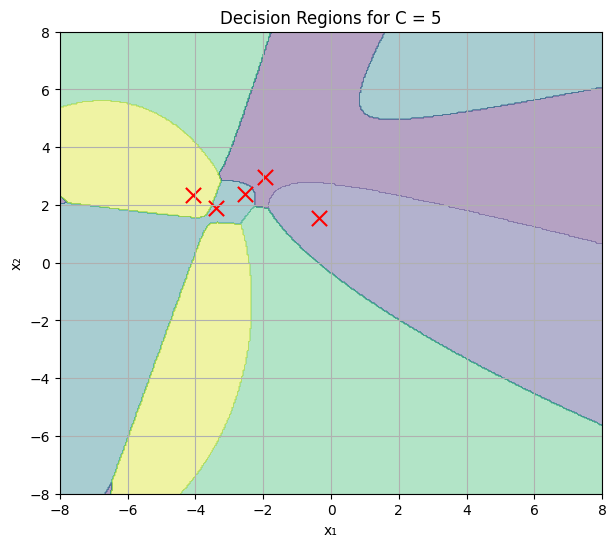

In [14]:
C = 5
mus, covs, priors = generate_multivariate_classes(C)

x1 = np.linspace(-8, 8, 400)
x2 = np.linspace(-8, 8, 400)
xx1, xx2 = np.meshgrid(x1, x2)

grid = np.c_[xx1.ravel(), xx2.ravel()]
labels = classify_multivariate(grid, mus, covs, priors)
labels = labels.reshape(xx1.shape)

plt.figure(figsize=(7,6))
plt.contourf(xx1, xx2, labels, alpha=0.4)
plt.scatter(mus[:,0], mus[:,1], c='red', marker='x', s=120)
plt.title("Decision Regions for C = 5")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.grid(True)
plt.show()


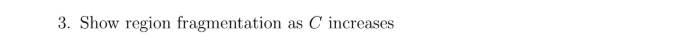

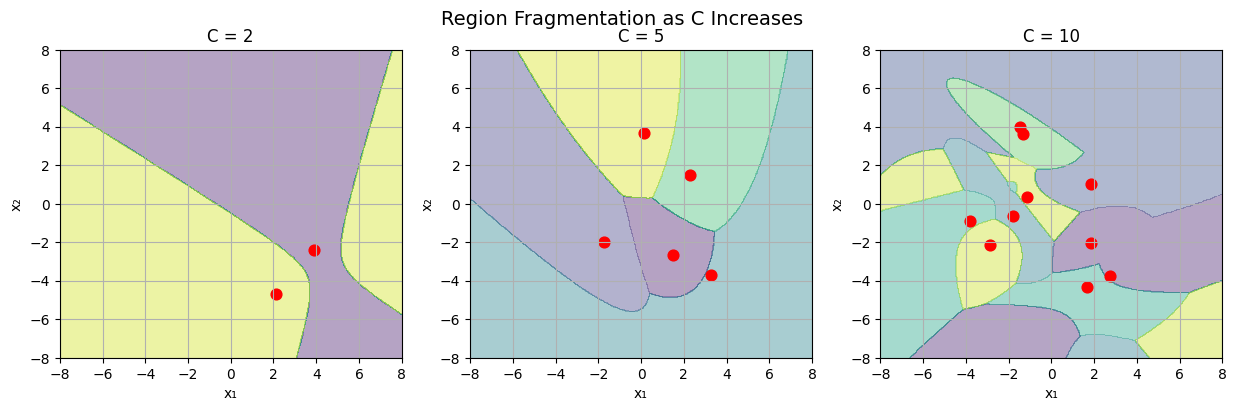

In [15]:
C_values = [2, 5, 10]

plt.figure(figsize=(15,4))

for idx, C in enumerate(C_values):
    mus, covs, priors = generate_multivariate_classes(C)
    labels = classify_multivariate(grid, mus, covs, priors)
    labels = labels.reshape(xx1.shape)

    plt.subplot(1, 3, idx+1)
    plt.contourf(xx1, xx2, labels, alpha=0.4)
    plt.scatter(mus[:,0], mus[:,1], c='red', s=60)
    plt.title(f"C = {C}")
    plt.xlabel("x₁")
    plt.ylabel("x₂")
    plt.grid(True)

plt.suptitle("Region Fragmentation as C Increases", fontsize=14)
plt.show()


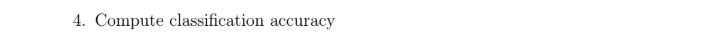

C = 2, Accuracy = 0.6204
C = 3, Accuracy = 0.9836
C = 5, Accuracy = 0.7928
C = 7, Accuracy = 0.8052
C = 10, Accuracy = 0.6340


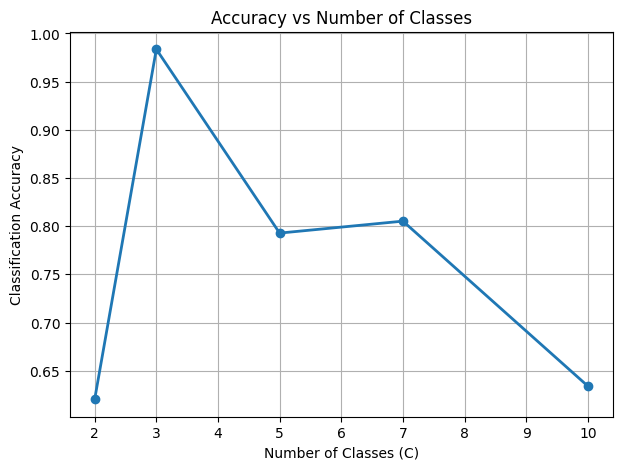

In [16]:
def compute_accuracy(C, N=5000):
    mus, covs, priors = generate_multivariate_classes(C)

    true_classes = np.random.choice(C, size=N, p=priors)
    samples = np.array([
        np.random.multivariate_normal(mus[i], covs[i])
        for i in true_classes
    ])

    preds = classify_multivariate(samples, mus, covs, priors)
    accuracy = np.mean(preds == true_classes)

    return accuracy



C_values = [2, 3, 5, 7, 10]
accuracies = []

for C in C_values:
    acc = compute_accuracy(C)
    accuracies.append(acc)
    print(f"C = {C}, Accuracy = {acc:.4f}")




plt.figure(figsize=(7,5))
plt.plot(C_values, accuracies, marker='o', linewidth=2)
plt.xlabel("Number of Classes (C)")
plt.ylabel("Classification Accuracy")
plt.title("Accuracy vs Number of Classes")
plt.grid(True)
plt.show()


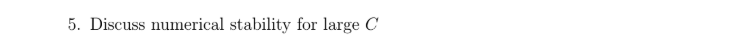

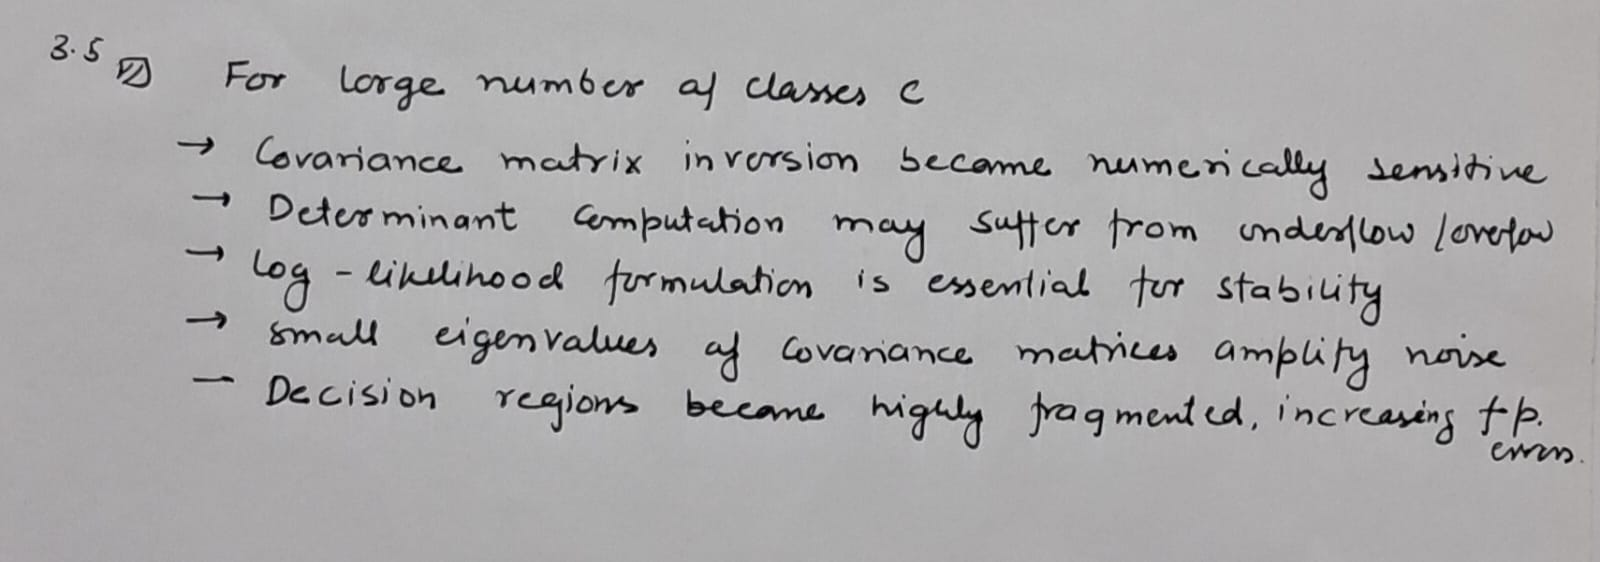

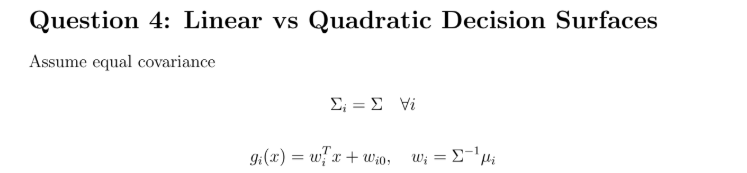

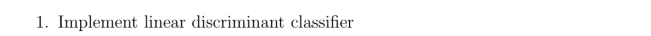

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv


def generate_linear_classes(C, dim=2):
    mus = []
    priors = np.ones(C) / C

    # Common covariance matrix
    A = np.random.randn(dim, dim)
    Sigma = A @ A.T + 0.5 * np.eye(dim)

    for _ in range(C):
        mu = np.random.uniform(-5, 5, dim)
        mus.append(mu)

    return np.array(mus), Sigma, priors


def linear_discriminant(X, mus, Sigma, priors):
    N = X.shape[0]
    C = len(mus)

    Sigma_inv = inv(Sigma)
    g = np.zeros((N, C))

    for i in range(C):
        w = Sigma_inv @ mus[i]
        w0 = -0.5 * mus[i].T @ Sigma_inv @ mus[i] + np.log(priors[i])
        g[:, i] = X @ w + w0

    return g


def linear_classifier(X, mus, Sigma, priors):
    g = linear_discriminant(X, mus, Sigma, priors)
    return np.argmax(g, axis=1)


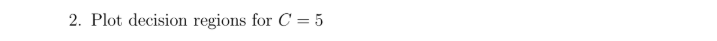

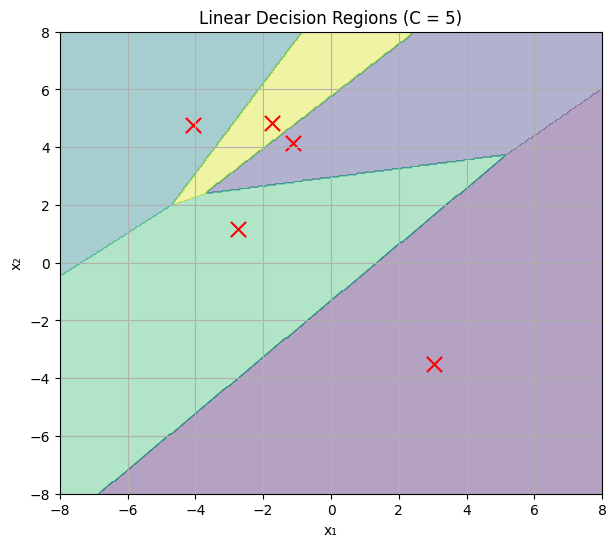

In [19]:
C = 5
mus, Sigma, priors = generate_linear_classes(C)

x1 = np.linspace(-8, 8, 400)
x2 = np.linspace(-8, 8, 400)
xx1, xx2 = np.meshgrid(x1, x2)

grid = np.c_[xx1.ravel(), xx2.ravel()]
labels = linear_classifier(grid, mus, Sigma, priors)
labels = labels.reshape(xx1.shape)

plt.figure(figsize=(7,6))
plt.contourf(xx1, xx2, labels, alpha=0.4)
plt.scatter(mus[:,0], mus[:,1], c='red', marker='x', s=120)
plt.title("Linear Decision Regions (C = 5)")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.grid(True)
plt.show()


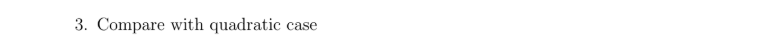

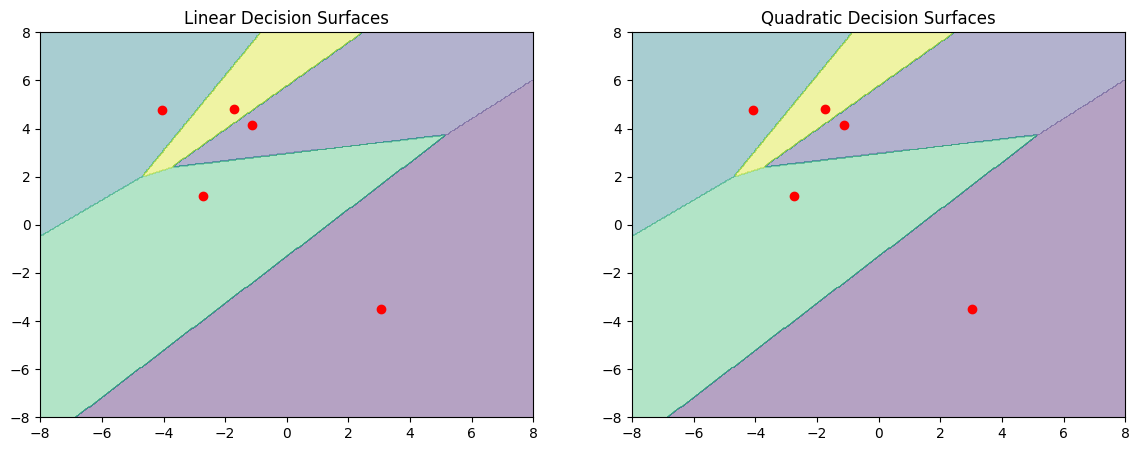

In [21]:
def quadratic_classifier(X, mus, covs, priors):
    N = X.shape[0]
    C = len(mus)
    g = np.zeros((N, C))

    for i in range(C):
        diff = X - mus[i]
        inv_cov = inv(covs[i])
        quad = np.sum(diff @ inv_cov * diff, axis=1)
        g[:, i] = (
            -0.5 * quad
            -0.5 * np.log(np.linalg.det(covs[i]))
            + np.log(priors[i])
        )
    return np.argmax(g, axis=1)



    # Quadratic case setup
covs = np.array([Sigma for _ in range(C)])

labels_quad = quadratic_classifier(grid, mus, covs, priors)
labels_quad = labels_quad.reshape(xx1.shape)

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.contourf(xx1, xx2, labels, alpha=0.4)
plt.scatter(mus[:,0], mus[:,1], c='red')
plt.title("Linear Decision Surfaces")

plt.subplot(1,2,2)
plt.contourf(xx1, xx2, labels_quad, alpha=0.4)
plt.scatter(mus[:,0], mus[:,1], c='red')
plt.title("Quadratic Decision Surfaces")

plt.show()



Additional *** code for curved boundary

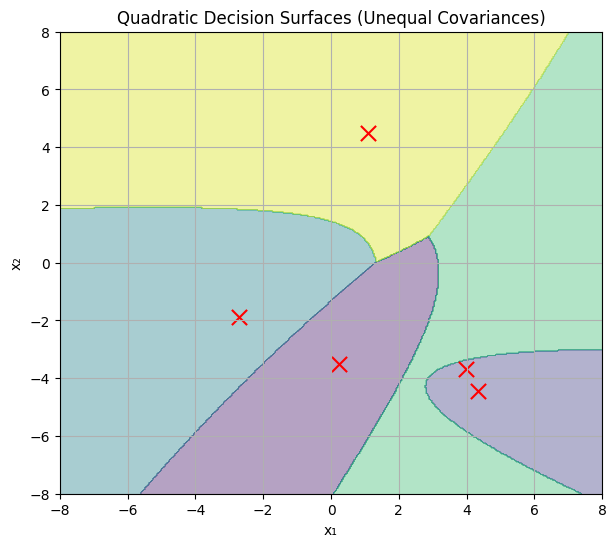

In [22]:
def generate_quadratic_classes(C, dim=2):
    mus = []
    covs = []
    priors = np.ones(C) / C

    for _ in range(C):
        mu = np.random.uniform(-5, 5, dim)
        A = np.random.randn(dim, dim)
        cov = A @ A.T + 0.5 * np.eye(dim)   # different covariance per class

        mus.append(mu)
        covs.append(cov)

    return np.array(mus), np.array(covs), priors


# Generate unequal covariance classes
C = 5
mus, covs, priors = generate_quadratic_classes(C)

labels_quad = quadratic_classifier(grid, mus, covs, priors)
labels_quad = labels_quad.reshape(xx1.shape)

plt.figure(figsize=(7,6))
plt.contourf(xx1, xx2, labels_quad, alpha=0.4)
plt.scatter(mus[:,0], mus[:,1], c='red', marker='x', s=120)
plt.title("Quadratic Decision Surfaces (Unequal Covariances)")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.grid(True)
plt.show()


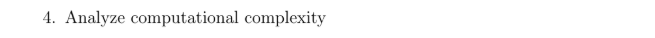

 Computational Complexity Analysis
Classifier	Per-sample complexity
Linear
𝑂
(
𝐶
𝑑
)
O(Cd)
Quadratic
𝑂
(
𝐶
𝑑
2
)
O(Cd
2
)

Where:

𝐶
C = number of classes

𝑑
d = feature dimension

 Linear classifier is computationally cheaper, especially for large
𝐶
C.

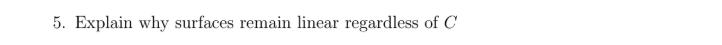

 Explanation

When all classes share the same covariance matrix:

Quadratic terms cancel during class comparison

Discriminant functions reduce to linear functions of
𝑥
x

Increasing number of classes only adds more linear functions

Hence, decision surfaces remain linear regardless of C

 Linearity depends on covariance equality, not number of classes.

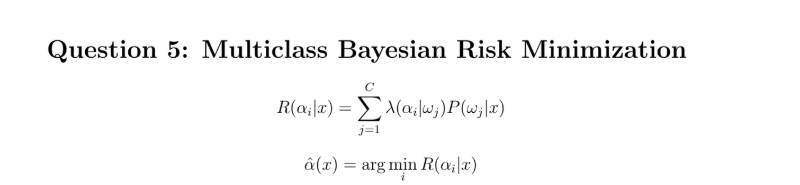

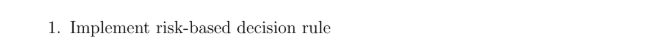

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def generate_classes(C):
    mus = np.linspace(0, 10, C)
    sigmas = np.random.uniform(0.5, 2.0, C)
    priors = np.ones(C) / C
    return mus, sigmas, priors
def posterior_probabilities(x, mus, sigmas, priors):
    C = len(mus)
    post = np.zeros((len(x), C))

    for i in range(C):
        post[:, i] = norm.pdf(x, mus[i], sigmas[i]) * priors[i]

    post /= np.sum(post, axis=1, keepdims=True)
    return post
def bayes_risk_classifier(x, mus, sigmas, priors, loss_matrix):
    post = posterior_probabilities(x, mus, sigmas, priors)
    risks = post @ loss_matrix.T   # R(alpha_i | x)
    return np.argmin(risks, axis=1), risks


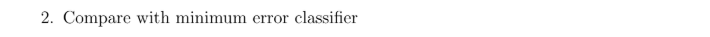

In [26]:
def minimum_error_classifier(x, mus, sigmas, priors):
    post = posterior_probabilities(x, mus, sigmas, priors)
    return np.argmax(post, axis=1)

x = np.linspace(-2, 12, 1000)
C = 5

mus, sigmas, priors = generate_classes(C)

# 0–1 loss matrix
loss_01 = np.ones((C, C)) - np.eye(C)

pred_risk, _ = bayes_risk_classifier(x, mus, sigmas, priors, loss_01)
pred_min_error = minimum_error_classifier(x, mus, sigmas, priors)

print("Risk classifier equals minimum error:",
      np.all(pred_risk == pred_min_error))


Risk classifier equals minimum error: True


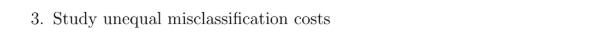

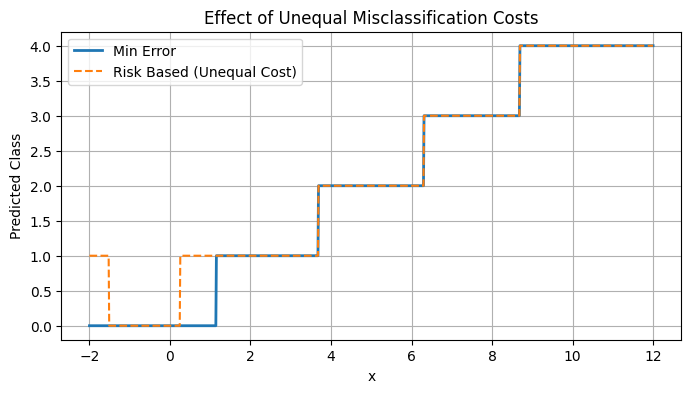

In [27]:
loss_unequal = np.ones((C, C)) - np.eye(C)

# Penalize misclassification of class 0 heavily
loss_unequal[0, :] = 5
loss_unequal[0, 0] = 0


pred_risk_unequal, risks = bayes_risk_classifier(
    x, mus, sigmas, priors, loss_unequal
)


plt.figure(figsize=(8,4))
plt.plot(x, pred_min_error, label="Min Error", linewidth=2)
plt.plot(x, pred_risk_unequal, '--', label="Risk Based (Unequal Cost)")
plt.xlabel("x")
plt.ylabel("Predicted Class")
plt.title("Effect of Unequal Misclassification Costs")
plt.legend()
plt.grid(True)
plt.show()


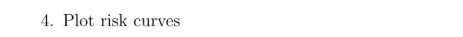

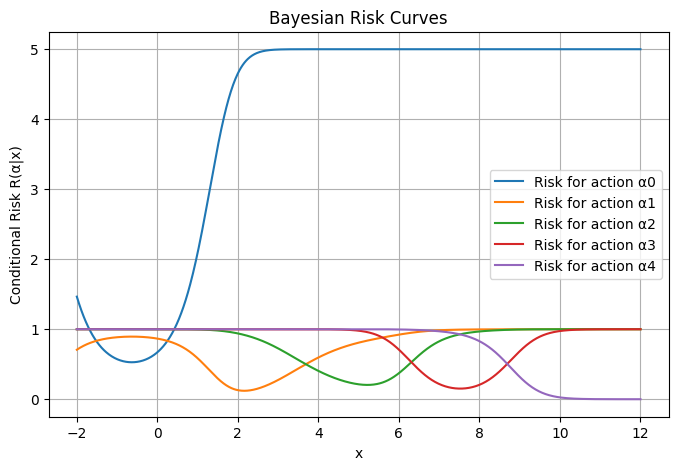

In [28]:
plt.figure(figsize=(8,5))

for i in range(C):
    plt.plot(x, risks[:, i], label=f"Risk for action α{i}")

plt.xlabel("x")
plt.ylabel("Conditional Risk R(α|x)")
plt.title("Bayesian Risk Curves")
plt.legend()
plt.grid(True)
plt.show()


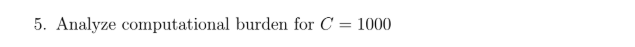

In [29]:
import time

C = 1000
x_test = np.array([5.0])  # single test point

mus, sigmas, priors = generate_classes(C)
loss = np.ones((C, C)) - np.eye(C)

start = time.time()
_, _ = bayes_risk_classifier(x_test, mus, sigmas, priors, loss)
end = time.time()

print(f"Time for Bayes risk classification with C={C}: {end-start:.4f} seconds")


Time for Bayes risk classification with C=1000: 0.0714 seconds


Computational Burden Analysis

Posterior computation:
𝑂
(
𝐶
)
O(C)

Risk computation (matrix product):
𝑂
(
𝐶
2
)
O(C
2
)

Total complexity per sample:
𝑂
(
𝐶
2
)
O(C
2
)

For large
𝐶
C (e.g., 1000):

Memory and time costs become significant

Practical systems use:

Sparse loss matrices

Cost-sensitive approximations

Top-k posterior pruning